# **1.Upload the data**

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#models
from sklearn.model_selection import cross_val_score

In [71]:
df = pd.read_csv('data.csv')

In [72]:
df.shape

(614, 13)

In [73]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [75]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


There is a lot values are missing so we have to handle missing values in preprocessing

In [76]:
##

In [77]:
##

# **2.Data PreProcessing**

In [78]:
#remove column Loan_ID , because it does not going to help to predict
df = df.drop('Loan_ID',axis =1)

In [79]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


**2.1 Now Handle missing values**

In [80]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Here we have Catogracical and Numarical null values so handle both

In [81]:
#for Catogarical we handle null values by mode of the column
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)

In [82]:
#for Numerical features
df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())
df.Loan_Amount_Term=df.Loan_Amount_Term.fillna(df.Loan_Amount_Term.mean())
df.Credit_History=df.Credit_History.fillna(df.Credit_History.mean())

In [83]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Now all the Catogracical and Numarical null values  has been cleared

**2.2 Change Catogarical features to Numerical values**

In [84]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

In [85]:
#############catogarical columns are
# Gender
# Married
# Dependents
# Education
# Self_Employed
# Property_Area

df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Married'] = label_encoder.fit_transform(df['Married'])
df['Dependents'] = label_encoder.fit_transform(df['Dependents'])
df['Education'] = label_encoder.fit_transform(df['Education'])
df['Self_Employed'] = label_encoder.fit_transform(df['Self_Employed'])
df['Property_Area'] = label_encoder.fit_transform(df['Property_Area'])

#also change for target
df['Loan_Status'] = label_encoder.fit_transform(df['Loan_Status'])


In [86]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


**2.3 Now we have to visualize the numerical data to see whetehr we have to Normalize  & clear Outliers**

In [87]:
#####################Numerical feature are
# ApplicantIncome
# CoapplicantIncome
# LoanAmount
# Loan_Amount_Term
# Credit_History

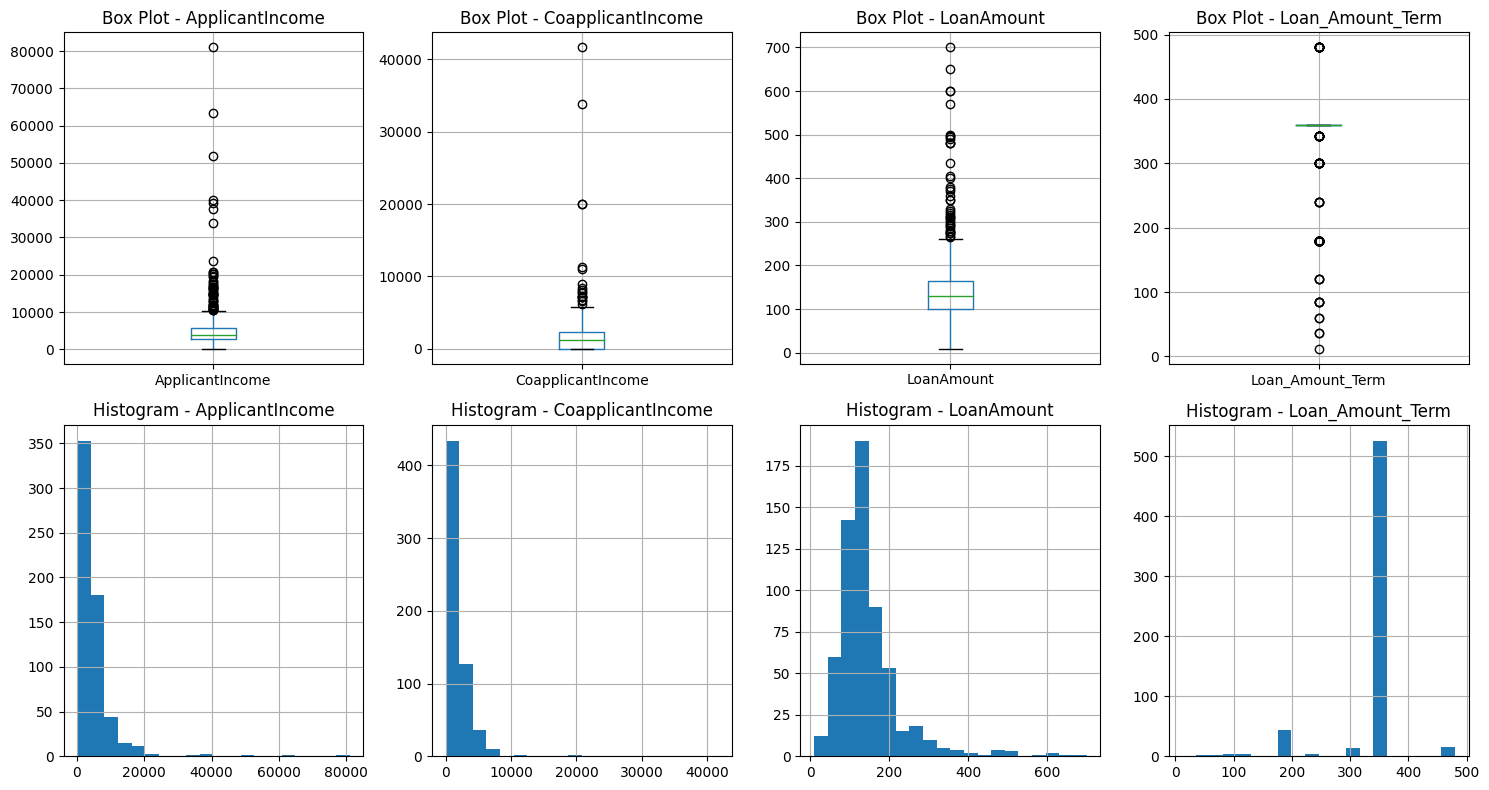

In [88]:

# Create a subplot with shape (2, 4) and size (15, 8)
plt.figure(figsize=(15, 8))

# Define the list of features to plot
features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# Plot box plots for the first row
for i, feature in enumerate(features, 1):
    plt.subplot(2, 4, i)
    df.boxplot(column=feature)
    plt.title(f'Box Plot - {feature}')

# Plot histograms for the second row
for i, feature in enumerate(features, 5):
    plt.subplot(2, 4, i)
    df[feature].hist(bins=20)
    plt.title(f'Histogram - {feature}')

# Adjust layout and display the subplots
plt.tight_layout()
plt.show()


So ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term need to be normalize & scale

In [89]:
#lets normalize by Cube Root Transformation
df['ApplicantIncome'] = np.cbrt(df['ApplicantIncome'])
df['CoapplicantIncome'] = np.cbrt(df['CoapplicantIncome'])
df['LoanAmount'] = np.cbrt(df['LoanAmount'])
df['Loan_Amount_Term'] = np.cbrt(df['Loan_Amount_Term'])

After the normalization ApplicantIncome,LoanAmount has been normalizd much

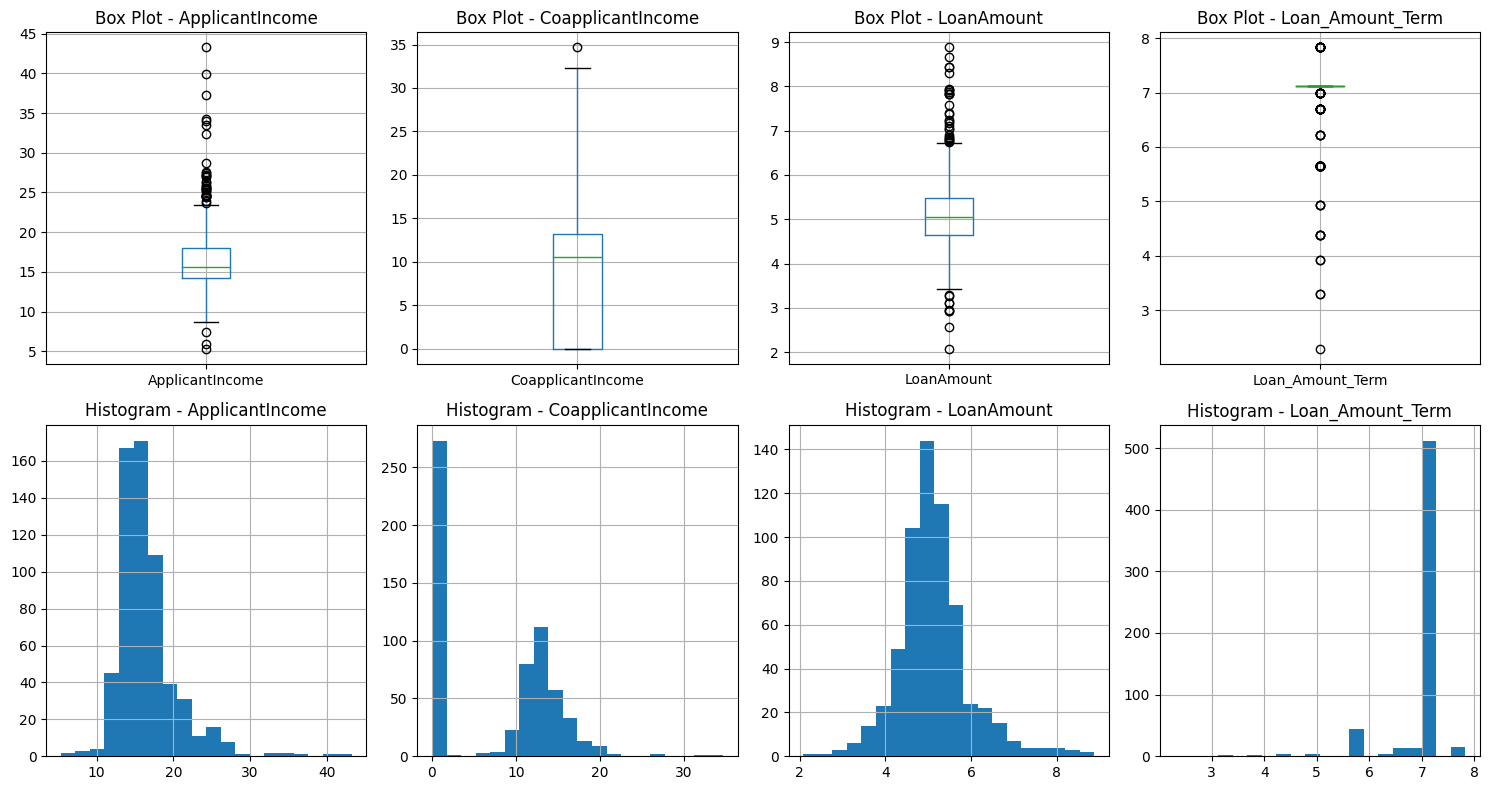

In [90]:
# Create a subplot with shape (2, 4) and size (15, 8)
plt.figure(figsize=(15, 8))

# Define the list of features to plot
features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# Plot box plots for the first row
for i, feature in enumerate(features, 1):
    plt.subplot(2, 4, i)
    df.boxplot(column=feature)
    plt.title(f'Box Plot - {feature}')

# Plot histograms for the second row
for i, feature in enumerate(features, 5):
    plt.subplot(2, 4, i)
    df[feature].hist(bins=20)
    plt.title(f'Histogram - {feature}')

# Adjust layout and display the subplots
plt.tight_layout()
plt.show()


# **Lab 02**

**Find Feature correlation with target**

In [91]:
target_variable = 'Loan_Status'

features = df.drop(columns=[target_variable])

In [92]:
import seaborn as sns

# Calculate the correlations between the target variable and  features
correlations = features.corrwith(df[target_variable])

# Create a DataFrame to store the correlations
correlation_df = pd.DataFrame({'Correlation': correlations})

# Sort the correlations in descending order to see the most correlated features at the top
correlation_df = correlation_df.sort_values(by='Correlation', ascending=False)

# Print or display the correlation values
print(correlation_df)


                   Correlation
Credit_History        0.540483
Married               0.091478
CoapplicantIncome     0.033582
Property_Area         0.032112
Gender                0.017987
Dependents            0.010118
ApplicantIncome       0.004341
Self_Employed        -0.003700
Loan_Amount_Term     -0.011473
LoanAmount           -0.042714
Education            -0.085884


Correlation between feature and targets for all features are almost same other than Credit histry so I can not drop any features

**Find Feature correlation with feature**

In [93]:

features = df.drop(columns=[target_variable])

# Calculate the correlation matrix between features
correlation_matrix = features.corr()


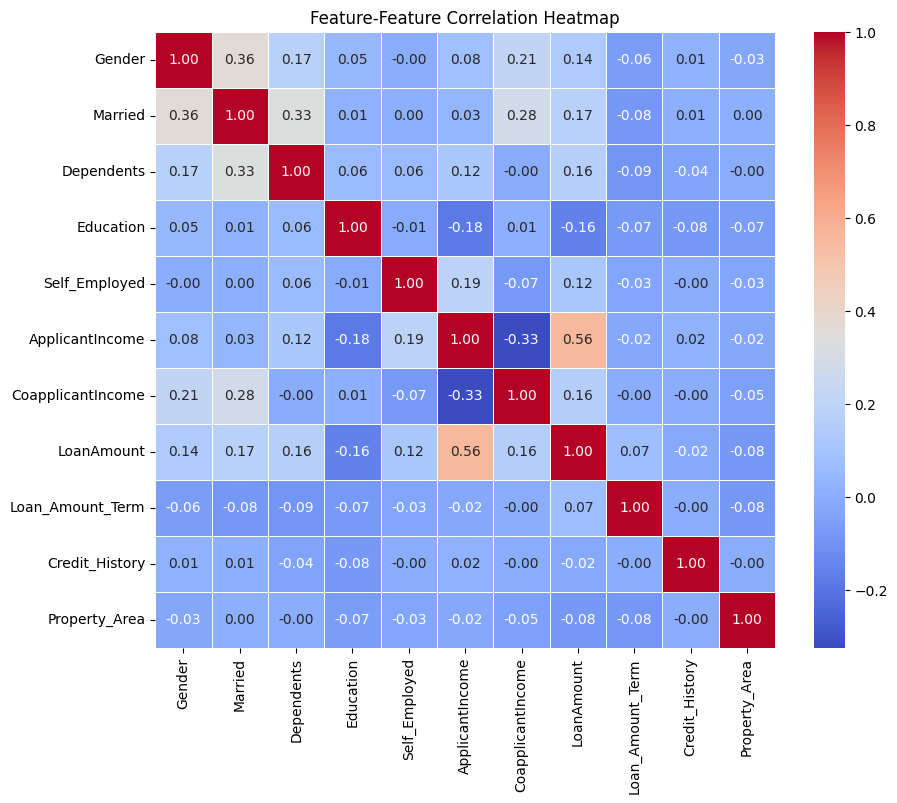

In [94]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature-Feature Correlation Heatmap')
plt.show()

Due to Not much Correlation between features and features I can not do Feature Engineering by correlated features

**Data Splitting**

Normal Data Splitting 80% and 20% to Train model without Cross Validation

In [95]:
from sklearn.model_selection import train_test_split

#features
X = df.drop(columns=[target_variable])

# Target variable
y = df[target_variable]

# Split the data
#random_state split is reproducible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

**Model Selections**  to Normally train this Splitted data set

Logistic Regression,Decision Trees,Random Forest,XGboost


**Logistic Regression**

Without tuning parameters

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logistic_model = LogisticRegression()
logistic_model.fit(X_train,y_train)

# predictions on the training data
train_pred_lg = logistic_model.predict(X_train)


# predictions on the testing data
test_pred_lg= logistic_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [97]:

# Calculate training accuracy
train_acc_lg = accuracy_score(y_train, train_pred_lg)*100
print('Training Accuracy: ',train_acc_lg)


#testing accuracy
test_acc_lg =accuracy_score(test_pred_lg,y_test)*100

print('Testing Accuracy: ',test_acc_lg)

Training Accuracy:  81.67006109979633
Testing Accuracy:  78.86178861788618


This accuracy can be improved

**Decision Trees**

Without tuning parameters

In [98]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# predictions on the training data
train_pred_dt = decision_tree.predict(X_train)

# predictions on the testing data
test_pred_dt = decision_tree.predict(X_test)

In [99]:
# Calculate training accuracy
train_acc_dt = accuracy_score(y_train, train_pred_dt)
print('Decision Tree Training Accuracy: ',train_acc_dt)


# Calculate testing accuracy
test_acc_dt = accuracy_score(y_test, test_pred_dt)
print('Decision Tree Testing Accuracy: ',test_acc_dt)

Decision Tree Training Accuracy:  1.0
Decision Tree Testing Accuracy:  0.7154471544715447


Decision Tree Training Accuracy is  1.0, so we can see that it has been Over Fit during the training. So it needs to be tuned

Also testing accuracy also low

**RandomForestClassifier**

Without tuning parameters

In [100]:
from sklearn.ensemble import RandomForestClassifier


# Create and train a Random Forest classifier
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

# Make predictions on the training data
train_pred_rf = random_forest_model.predict(X_train)

# Make predictions on the testing data
test_pred_rf = random_forest_model.predict(X_test)


In [101]:
# Calculate training accuracy
train_acc_rf = accuracy_score(y_train, train_pred_rf)
print('Random Forest Training Accuracy: ',train_acc_rf)

# Calculate testing accuracy
test_acc_rf = accuracy_score(y_test, test_pred_rf)
print('Random Forest Testing Accuracy: ',test_acc_rf)

Random Forest Training Accuracy:  1.0
Random Forest Testing Accuracy:  0.7642276422764228


Random Forest classifier Training Accuracy is  also 1.0, so we can see that it has been Over Fit during the training. So it needs to be tuned

Also testing accuracy also *low*

# **Lab 03**

# **1. Tune Logistic Regression**

**1.Lets find best Random state value**

In [102]:
# Initialize variables
best_test_accuracy = 0
best_random_state = None

# Loop through 100 random states
for random_state in range(1, 101):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    logistic_model = LogisticRegression()
    logistic_model.fit(X_train, y_train)

    # Predictions on the testing data
    test_pred = logistic_model.predict(X_test)

    # Calculate the test accuracy
    test_accuracy = accuracy_score(y_test, test_pred)

    # Check if the current random state's accuracy is the best so far
    if test_accuracy > best_test_accuracy:
        best_test_accuracy = test_accuracy
        best_random_state = random_state

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [103]:
# Print the best random state and its corresponding test accuracy
print(f"Best Random State: {best_random_state}")
print(f"Best Test Accuracy: {best_test_accuracy:.4f}")

Best Random State: 8
Best Test Accuracy: 0.8862


In [104]:
#so random_state=8
X_train_lg, X_test_lg, y_train_lg, y_test_lg = train_test_split(X, y, test_size=0.2, random_state=8)

**2.Hyper_parameter Tuning**

In [105]:
#Default
#accuracy = 81,78 %
logistic_model_new = LogisticRegression(penalty='l2', dual=False, tol=0.0001,
                                      C=1.0, fit_intercept=True,
                                      intercept_scaling=1, class_weight=None,
                                      random_state=None, solver='lbfgs',
                                      max_iter=100, multi_class='auto',
                                      verbose=0, warm_start=False,
                                      n_jobs=None, l1_ratio=None)

logistic_model_new.fit(X_train_lg,y_train_lg)

train_pred_lg = logistic_model_new.predict(X_train_lg)
test_pred_lg= logistic_model_new.predict(X_test_lg)

# Calculate training accuracy
train_acc_lg = accuracy_score(y_train_lg, train_pred_lg)
print('Training Accuracy: ',train_acc_lg)

#testing accuracy
test_acc_lg =accuracy_score(test_pred_lg,y_test_lg)
print('Testing Accuracy: ',test_acc_lg)

Training Accuracy:  0.7881873727087576
Testing Accuracy:  0.8861788617886179


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**3.Let's try Cross Validation**

In [106]:
#taking nomal model
logistic_model = LogisticRegression()

# Perform 5-fold cross-validation
#'scoring' is the evaluation metric (e.g., accuracy, precision, recall)
scores_lg = cross_val_score(logistic_model, X, y, cv=7, scoring='accuracy')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [107]:
# Print the cross-validation scores
print("Cross-Validation Scores:", scores_lg)

# Calculate and print the mean accuracy
mean_accuracy = scores_lg.mean()
print("Mean Accuracy:", mean_accuracy)

Cross-Validation Scores: [0.82954545 0.76136364 0.77272727 0.78409091 0.85227273 0.82758621
 0.83908046]
Mean Accuracy: 0.8095238095238094


**############** So I am getting less error while Doing cross validation **< 88%**



**4.So Search best hyper parameter**

In [108]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define distributions for hyperparameters
param_dist = {
    'C': uniform(loc=0, scale=4),  # Use a continuous uniform distribution for C
    'penalty': ['l1', 'l2']  # Regularization types
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(LogisticRegression(), param_distributions=param_dist, n_iter=50, cv=7, scoring='accuracy')

# Fit the random search to your data
random_search.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

RandomizedSearchCV(cv=7, estimator=LogisticRegression(), n_iter=50,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7b1f27718a00>,
                                        'penalty': ['l1', 'l2']},
                   scoring='accuracy')

In [109]:

# Get the best hyperparameters from the random search
best_C = random_search.best_params_['C']
best_penalty = random_search.best_params_['penalty']

# The best hyperparameters are stored in best_C and best_penalty


In [110]:
best_C

0.4805582754432165

In [111]:
best_penalty

'l2'

In [112]:
#after find c=2.224088361200505,penalty = l2
#
logistic_model=LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=2.224088361200505, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)


logistic_model.fit(X_train_lg,y_train_lg)

# predictions on the training data
train_pred_lg = logistic_model.predict(X_train_lg)
# predictions on the testing data
test_pred_lg= logistic_model.predict(X_test_lg)

# Calculate training accuracy
train_acc_lg = accuracy_score(y_train_lg, train_pred_lg)*100
print('Training Accuracy: ',train_acc_lg)
#testing accuracy
test_acc_lg =accuracy_score(test_pred_lg,y_test_lg)*100
print('Testing Accuracy: ',test_acc_lg)

Training Accuracy:  78.81873727087576
Testing Accuracy:  88.6178861788618


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


So No change in accuacy even if i Tune Hyperparameter SO the last model is  **logistic_model_new**

# **2. Tune DT**

**1.Tune HP to prevent OF in based model**

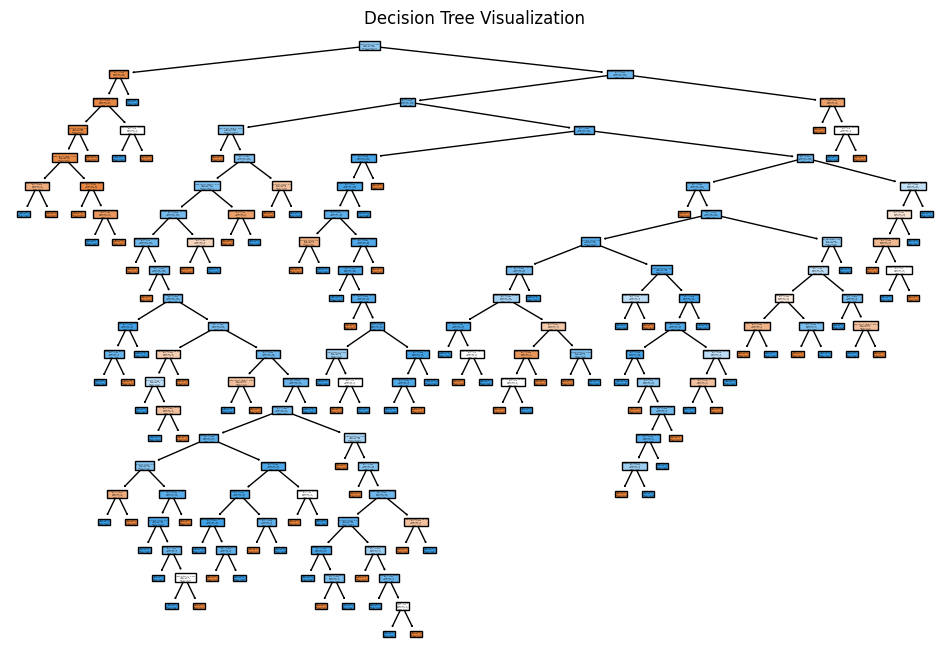

In [113]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
plot_tree(decision_tree, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.title("Decision Tree Visualization")
plt.show()


In [114]:
#Default
#DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)


# Create a Decision Tree model with hyperparameters
decision_tree = DecisionTreeClassifier(
    max_depth=11,  # Limit the maximum depth of the tree
    min_samples_split=2,  # The minimum number of samples required to split an internal node
    min_samples_leaf=1,  # The minimum number of samples required to be a leaf node
    random_state=4  # Set a random seed for consistency
)

# Fit the Decision Tree model to the training data
decision_tree.fit(X_train, y_train)

# Predictions on the training data
train_pred = decision_tree.predict(X_train)

# Predictions on the testing data
test_pred = decision_tree.predict(X_test)

# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")


Training Accuracy: 0.9430
Testing Accuracy: 0.7724


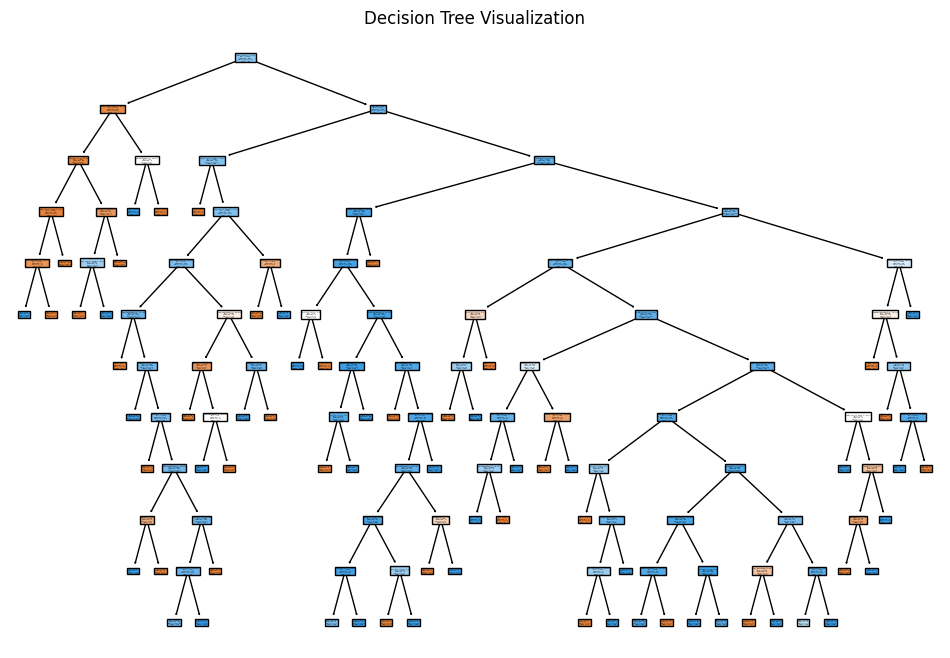

In [115]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
plot_tree(decision_tree, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.title("Decision Tree Visualization")
plt.show()

**2.Find best Sample split to high Accuracy**

In [116]:
# Initialize variables to keep track of the best accuracy and its corresponding random state
best_test_accuracy = 0
best_random_state = None

# Loop through 100 random states
for random_state in range(1, 101):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    DT = DecisionTreeClassifier(
    max_depth=11,  # Limit the maximum depth of the tree
    min_samples_split=2,  # The minimum number of samples required to split an internal node
    min_samples_leaf=1,  # The minimum number of samples required to be a leaf node
    random_state=4  # Set a random seed for consistency
)

    DT.fit(X_train, y_train)

    # Predictions on the testing data
    test_pred = DT.predict(X_test)

    # Calculate the test accuracy
    test_accuracy = accuracy_score(y_test, test_pred)

    # Check if the current random state's accuracy is the best so far
    if test_accuracy > best_test_accuracy:
        best_test_accuracy = test_accuracy
        best_random_state = random_state

In [117]:
# Print the best random state and its corresponding test accuracy
print(f"Best Random State: {best_random_state}")
print(f"Best Test Accuracy: {best_test_accuracy:.4f}")

Best Random State: 19
Best Test Accuracy: 0.8374


In [118]:
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X, y, test_size=0.2, random_state=19)

In [119]:
DT_new =DecisionTreeClassifier(
    max_depth=11,  # Limit the maximum depth of the tree
    min_samples_split=2,  # The minimum number of samples required to split an internal node
    min_samples_leaf=1,  # The minimum number of samples required to be a leaf node
    random_state=4  # Set a random seed for consistency
)

DT_new.fit(X_train_dt, y_train_dt)

# predictions on the training data
train_pred_dt = DT_new.predict(X_train_dt)

# predictions on the testing data
test_pred_dt = DT_new.predict(X_test_dt)

In [120]:
# Calculate training accuracy
train_acc_dt = accuracy_score(y_train_dt, train_pred_dt)
print('Decision Tree Training Accuracy: ',train_acc_dt)


# Calculate testing accuracy
test_acc_dt = accuracy_score(y_test_dt, test_pred_dt)
print('Decision Tree Testing Accuracy: ',test_acc_dt)

Decision Tree Training Accuracy:  0.9022403258655805
Decision Tree Testing Accuracy:  0.8373983739837398


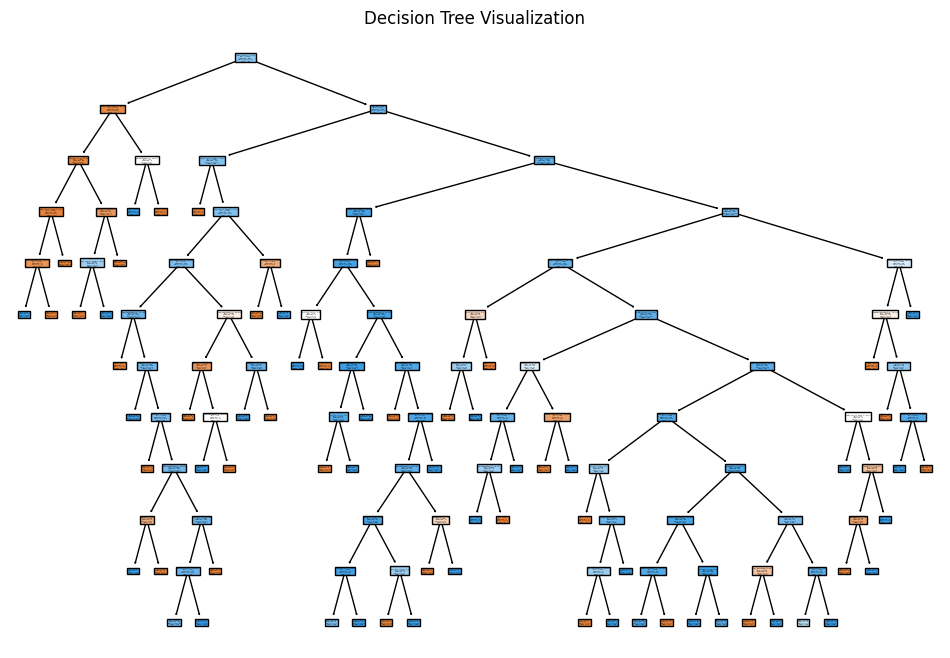

In [121]:
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
plot_tree(decision_tree, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.title("Decision Tree Visualization")
plt.show()

**3.Cross Validation**

In [122]:
#taking nomal model
DT_cv = DecisionTreeClassifier(
    max_depth=11,  # Limit the maximum depth of the tree
    min_samples_split=2,  # The minimum number of samples required to split an internal node
    min_samples_leaf=1,  # The minimum number of samples required to be a leaf node
    random_state=4  # Set a random seed for consistency
)

# Perform ,3,5,6,7-fold cross-validation
#'scoring' is the evaluation metric (e.g., accuracy, precision, recall)
scores_dt = cross_val_score(DT_cv, X, y, cv=5, scoring='accuracy')

In [123]:
# Print the cross-validation scores
print("Cross-Validation Scores:", scores_dt)

# Calculate and print the mean accuracy
mean_accuracy = scores_dt.mean()
print("Mean Accuracy:", mean_accuracy)

Cross-Validation Scores: [0.67479675 0.69918699 0.73170732 0.75609756 0.75409836]
Mean Accuracy: 0.7231773957083832


**#####################** Accuracy not has been improved more than **83%**

**So my final mode for DT is "DT_new"**

## **3. Tune RandomForest**

**1.Tune HP to prevent OF in based model**

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [125]:
# Create and train a Random Forest classifier
RF_one = RandomForestClassifier(n_estimators=4, criterion='gini', max_depth=5,
                                min_samples_split=2, min_samples_leaf=1
                                , random_state=7,  warm_start=True)

RF_one.fit(X_train, y_train)

# Make predictions on the training data
train_pred_rf = RF_one.predict(X_train)

# Make predictions on the testing data
test_pred_rf = RF_one.predict(X_test)

# Calculate training accuracy
train_acc_rf = accuracy_score(y_train, train_pred_rf)
print('Random Forest Training Accuracy: ',train_acc_rf)

# Calculate testing accuracy
test_acc_rf = accuracy_score(y_test, test_pred_rf)
print('Random Forest Testing Accuracy: ',test_acc_rf)

Random Forest Training Accuracy:  0.8289205702647657
Random Forest Testing Accuracy:  0.7967479674796748


**2.Find best Sample split fo high Accuracy**

In [126]:
# Initialize variables to keep track of the best accuracy and its corresponding random state
best_test_accuracy = 0
best_random_state = None

# Loop through 100 random states
for random_state in range(1, 101):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    RF_two = RandomForestClassifier(n_estimators=4, criterion='gini', max_depth=5,
                                min_samples_split=2, min_samples_leaf=1,
                                random_state=7,  warm_start=True)


    RF_two.fit(X_train, y_train)

    # Predictions on the testing data
    test_pred = RF_two.predict(X_test)

    # Calculate the test accuracy
    test_accuracy = accuracy_score(y_test, test_pred)

    # Check if the current random state's accuracy is the best so far
    if test_accuracy > best_test_accuracy:
        best_test_accuracy = test_accuracy
        best_random_state = random_state

In [127]:
# Print the best random state and its corresponding test accuracy
print(f"Best Random State: {best_random_state}")
print(f"Best Test Accuracy: {best_test_accuracy:.4f}")

Best Random State: 8
Best Test Accuracy: 0.8862


Now create model for Random_state=8

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

# Create and train a Random Forest classifier
RF_final = RandomForestClassifier(n_estimators=4, criterion='gini', max_depth=5,
                                min_samples_split=2, min_samples_leaf=1
                                , random_state=7,  warm_start=True)

RF_final.fit(X_train, y_train)

# Make predictions on the training data
train_pred_rf = RF_final.predict(X_train)

# Make predictions on the testing data
test_pred_rf = RF_final.predict(X_test)

# Calculate training accuracy
train_acc_rf = accuracy_score(y_train, train_pred_rf)
print('Random Forest Training Accuracy: ',train_acc_rf)

# Calculate testing accuracy
test_acc_rf = accuracy_score(y_test, test_pred_rf)
print('Random Forest Testing Accuracy: ',test_acc_rf)

Random Forest Training Accuracy:  0.8044806517311609
Random Forest Testing Accuracy:  0.8861788617886179


**Cross Validation**

In [129]:
#taking nomal model
RF_cv = RandomForestClassifier(n_estimators=4, criterion='gini', max_depth=5,
                                min_samples_split=2, min_samples_leaf=1
                                , random_state=7,  warm_start=True)

# Perform ,3,5,6,7-fold cross-validation
#'scoring' is the evaluation metric (e.g., accuracy, precision, recall)
scores_RF = cross_val_score(RF_cv, X, y, cv=4, scoring='accuracy')

In [130]:
#Print the cross-validation scores
print("Cross-Validation Scores:", scores_RF)

# Calculate and print the mean accuracy
mean_accuracy = scores_dt.mean()
print("Mean Accuracy:", mean_accuracy)

Cross-Validation Scores: [0.78571429 0.77272727 0.81045752 0.81045752]
Mean Accuracy: 0.7231773957083832


###############3No iprovement ins Cross validation sofinal model is

**RF_final**

Random Forest Training Accuracy:  0.8044806517311609

Random Forest Testing Accuracy:  0.8861788617886179

# **Lab 04**

# **4.XGBoost**

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [132]:
import xgboost as xgb

# Create and train an XGBoost classifier
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

# Make predictions on the training data
train_pred_xgb = xgb_model.predict(X_train)

# Make predictions on the testing data
test_pred_xgb = xgb_model.predict(X_test)

# Calculate training accuracy
train_acc_xgb = accuracy_score(y_train, train_pred_xgb)
print('XGBoost Training Accuracy:', train_acc_xgb)

# Calculate testing accuracy
test_acc_xgb = accuracy_score(y_test, test_pred_xgb)
print('XGBoost Testing Accuracy:', test_acc_xgb)


XGBoost Training Accuracy: 1.0
XGBoost Testing Accuracy: 0.7642276422764228


**Over fitting**

**1.Lets find best parameter by GridSearch**

In [133]:
from sklearn.model_selection import GridSearchCV

# Define the XGBoost model
xgb_one_new= xgb.XGBClassifier()

# Define the hyperparameters and their possible values for the grid search
param_grid = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [3,4,5],
    'max_depth': [3, 4],
    'min_child_weight': [1, 2],
    'gamma' : [0.1,0.01],
    'seed' : [3,4,5,6]
}

# Create a GridSearchCV object
grid_search_new = GridSearchCV(estimator=xgb_one_new, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the grid search to the data
grid_search_new.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search_new.best_params_
print("Best Hyperparameters:", best_params)

# Get the best XGBoost model
best_xgb_model = grid_search_new.best_estimator_

#for training accuracy
train_pred_xgb = best_xgb_model.predict(X_train)
train_acc_xgb = accuracy_score(y_train, train_pred_xgb)
print('XGBoost Training Accuracy:', train_acc_xgb)

# Make predictions on the testing data using the best model
test_pred_xgb = best_xgb_model.predict(X_test)

# Calculate testing accuracy
test_acc_xgb = accuracy_score(y_test, test_pred_xgb)
print('XGBoost Testing Accuracy with Best Parameters:', test_acc_xgb)


Best Hyperparameters: {'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 4, 'seed': 3}
XGBoost Training Accuracy: 0.814663951120163
XGBoost Testing Accuracy with Best Parameters: 0.7886178861788617


**2.Find best Sample split fo high Accuracy**

In [134]:
# Initialize variables
best_test_accuracy_XGB = 0
best_random_state_XGB = None

# Loop through 100 random states
for random_state in range(1, 101):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    xgb_one_new_2= xgb.XGBClassifier()
    param_grid = {
    'learning_rate': [ 0.1],
    'max_depth': [3],
    'min_child_weight': [1],
    'gamma' : [0.1],
    'n_estimators': [5],
    'seed' : [3]
    }

    # Create a GridSearchCV object
    grid_search_new_2 = GridSearchCV(estimator=xgb_one_new_2, param_grid=param_grid, scoring='accuracy', cv=5)

    # Fit the grid search to the data
    grid_search_new_2.fit(X_train, y_train)

    # Make predictions on the testing data
    test_pred_xgb = grid_search_new_2.predict(X_test)


    # Calculate testing accuracy
    test_acc_xgb = accuracy_score(y_test, test_pred_xgb)

    # Check if the current random state's accuracy is the best so far
    if test_acc_xgb > best_test_accuracy_XGB:
        best_test_accuracy_XGB = test_acc_xgb
        best_random_state_XGB = random_state

In [135]:
# Print the best random state and its corresponding test accuracy
print(f"Best Random State: {best_random_state}")
print(f"Best Test Accuracy: {best_test_accuracy:.4f}")

Best Random State: 8
Best Test Accuracy: 0.8862


**So Random state is 8**

**Final XGB final model**

In [136]:
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X, y, test_size=0.2, random_state=8)

xgb_f= xgb.XGBClassifier()
param_grid = {
    'learning_rate': [ 0.1],
    'max_depth': [3],
    'min_child_weight': [1],
    'gamma' : [0.1],
    'n_estimators': [5],
    'seed' : [3]
    }

xgb_f = GridSearchCV(estimator=xgb_f, param_grid=param_grid, scoring='accuracy', cv=5)

xgb_f.fit(X_train_f, y_train_f)


train_pred_xgb_f = xgb_f.predict(X_train_f)
test_pred_xgb_f = xgb_f.predict(X_test_f)

train_acc_xgb_f = accuracy_score(y_train_f, train_pred_xgb_f)
print('XGBoost Training Accuracy:', train_acc_xgb_f)

test_acc_xgb_f = accuracy_score(y_test_f, test_pred_xgb_f)
print('XGBoost Testing Accuracy:', test_acc_xgb_f)

XGBoost Training Accuracy: 0.790224032586558
XGBoost Testing Accuracy: 0.8861788617886179


**Final model is  "xgb_f"**

So we are getting Training & Testing accuracies

XGB : xgb_f (Test-0.886, Train-0.790)

RandomForest : RF_final (Test-0.886, Train-0.804)

DecisionTree : DT_new (Test-0.837, Train-0.902)

LogisticRegression : logistic_model_new (Test-0.886, Train-0.788)

So we are getting Better Train & Testing accuracies in models XGB & Random forest

Also Random forest is a Bagging Ensambling model

XGB is a Boosting Ensambling model

# **Ensambling**

**Voting Classifier method**

In [ ]:
from sklearn.ensemble import VotingClassifier

best_test_accuracy = 0
best_random_state = None

# Loop through 100 random states
for random_state in range(1, 101):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    lr_e =LogisticRegression()
    dt_e =DecisionTreeClassifier(max_depth=11, min_samples_split=2, min_samples_leaf=1, random_state=4)
    rf_e =RandomForestClassifier(n_estimators=4, criterion='gini', max_depth=5, min_samples_split=2, min_samples_leaf=1, random_state=7,  warm_start=True)
    xgb_e = xgb.XGBClassifier(learning_rate = 0.1,max_depth = 3,min_child_weight = 1,gamma = 0.1,n_estimators = 5,seed = 3)


    models = [('XGB', xgb_e), ('RandomForest', rf_e ), ('DecisionTree', dt_e), ('LogisticRegression', lr_e)]
    voting_classifier = VotingClassifier(estimators=models, voting='soft')
    voting_classifier.fit(X_train,y_train)

    # Predictions on the testing data
    test_pred = voting_classifier.predict(X_test)

    # Calculate the test accuracy
    test_accuracy = accuracy_score(y_test, test_pred)

    # Check if the current random state's accuracy is the best so far
    if test_accuracy > best_test_accuracy:
        best_test_accuracy = test_accuracy
        best_random_state = random_state

In [138]:
print(f"Best Random State: {best_random_state}")
print(f"Best Test Accuracy: {best_test_accuracy:.4f}")

Best Random State: 8
Best Test Accuracy: 0.8862


# So Our final model and final accuracy

In [139]:
X_train_e, X_test_e, y_train_e, y_test_e = train_test_split(X, y, test_size=0.2, random_state=8)

lr_e =LogisticRegression()
dt_e =DecisionTreeClassifier(max_depth=11, min_samples_split=2, min_samples_leaf=1, random_state=4)
rf_e =RandomForestClassifier(n_estimators=4, criterion='gini', max_depth=5, min_samples_split=2, min_samples_leaf=1, random_state=7,  warm_start=True)
xgb_e = xgb.XGBClassifier(learning_rate = 0.1,max_depth = 3,min_child_weight = 1,gamma = 0.1,n_estimators = 5,seed = 3)


models = [('XGB', xgb_e), ('RandomForest', rf_e ), ('DecisionTree', dt_e), ('LogisticRegression', lr_e)]
En_model = VotingClassifier(estimators=models, voting='soft')


En_model.fit(X_train_e,y_train_e)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('XGB',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=0.1,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rat...
                                            missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None, n_estimators=5,
                                            n_jobs=None, num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('RandomForest',
                              RandomForestClassifier(max_depth=5,
                                                     n_estimators=4,
                                                     random_state=7,
                                                     warm_start=True)),
                             ('DecisionTree',
                              DecisionTreeClassifier(max_depth=11,
                                                     random_state=4)),
                             ('LogisticRegression', LogisticRegression())],
                 voting='soft')

In [140]:
train_pred_e = En_model.predict(X_train_e)
test_pred_e  = En_model.predict(X_test_e)

train_acc_e = accuracy_score(y_train_e, train_pred_e)
print('Training Accuracy:', train_acc_e)

test_acc_e = accuracy_score(y_test_e, test_pred_e)
print('Testing Accuracy:', test_acc_e)

Training Accuracy: 0.835030549898167
Testing Accuracy: 0.8861788617886179


# **Now Do for validation data**

In [142]:
val = pd.read_csv('test.csv')
val.shape

(367, 12)

In [143]:
val = val.drop('Loan_ID',axis =1)
val.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [144]:
val.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [145]:
#for Catogarical we handle null values by mode of the column
val['Gender'].fillna(val['Gender'].mode()[0],inplace=True)
val['Dependents'].fillna(val['Dependents'].mode()[0],inplace=True)
val['Self_Employed'].fillna(val['Self_Employed'].mode()[0],inplace=True)

#for Numerical features
val.LoanAmount = df.LoanAmount.fillna(val.LoanAmount.mean())
val.Loan_Amount_Term=df.Loan_Amount_Term.fillna(val.Loan_Amount_Term.mean())
val.Credit_History=df.Credit_History.fillna(val.Credit_History.mean())

In [146]:
#############catogarical columns to Numerical
# Gender
# Married
# Dependents
# Education
# Self_Employed
# Property_Area

val['Gender'] = label_encoder.fit_transform(val['Gender'])
val['Married'] = label_encoder.fit_transform(val['Married'])
val['Dependents'] = label_encoder.fit_transform(val['Dependents'])
val['Education'] = label_encoder.fit_transform(val['Education'])
val['Self_Employed'] = label_encoder.fit_transform(val['Self_Employed'])
val['Property_Area'] = label_encoder.fit_transform(val['Property_Area'])


In [147]:
val.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,5.270588,7.113787,1.0,2
1,1,1,1,0,0,3076,1500,5.039684,7.113787,1.0,2
2,1,1,2,0,0,5000,1800,4.041240,7.113787,1.0,2
3,1,1,2,0,0,2340,2546,4.932424,7.113787,1.0,2
4,1,0,0,1,0,3276,0,5.204828,7.113787,1.0,2


In [148]:
#lets normalize by Cube Root Transformation
val['ApplicantIncome'] = np.cbrt(val['ApplicantIncome'])
val['CoapplicantIncome'] = np.cbrt(val['CoapplicantIncome'])
val['LoanAmount'] = np.cbrt(val['LoanAmount'])
val['Loan_Amount_Term'] = np.cbrt(val['Loan_Amount_Term'])

In [149]:
X_val=val

In [150]:
pred_val= En_model.predict(X_val)

In [151]:
pred_val

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,

In [152]:
mapping = {1: 'Y', 0: 'N'}
pred_val_converted = [mapping[pred] for pred in pred_val]
print(pred_val_converted)

['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',

In [153]:
from google.colab import files

submission_df = pd.read_csv('sample_submission.csv')

# Add the converted predictions to the second column (assuming 'Loan_ID' is the first column)
submission_df['Loan_Status'] = pred_val_converted


# Save the updated DataFrame to a new CSV file
submission_df.to_csv(r'C:\Users\mzaah\Desktop\My Files\UNI Doc\Projects\ML Projects\Loan Predicton\new_submission.csv', index=False)


# Download the new submission CSV file
files.download(r'C:\Users\mzaah\Desktop\My Files\UNI Doc\Projects\ML Projects\Loan Predicton\new_submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>